In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization
from g_media_pipe import extract_data_from_video, save_data
import ast
import glob
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


### Importing the data

In [12]:
directory = os.path.join("model_data")
csv_files = glob.glob(os.path.join(directory,"Bicep_Curls","Proper","*.csv"))
csv_files

['model_data/Bicep_Curls/Proper/properDumbellFront.csv']

### Preview the Data

In [14]:
df = pd.read_csv(csv_files[0])
df = df[["LEFT_THUMB","LEFT_WRIST","LEFT_ELBOW","LEFT_SHOULDER","RIGHT_THUMB", "RIGHT_WRIST", "RIGHT_ELBOW","RIGHT_SHOULDER"]]
df.head()

,LEFT_THUMB,LEFT_WRIST,LEFT_ELBOW,LEFT_SHOULDER,RIGHT_THUMB,RIGHT_WRIST,RIGHT_ELBOW,RIGHT_SHOULDER
0,"[0.5792677998542786, 0.6375810503959656, -0.08...","[0.5746462941169739, 0.6152817606925964, -0.07...","[0.5507841110229492, 0.5030269026756287, -0.01...","[0.541536808013916, 0.3538563847541809, -0.062...","[0.4181043207645416, 0.6566473245620728, -0.11...","[0.4185994267463684, 0.6318515539169312, -0.09...","[0.43267449736595154, 0.5037679672241211, -0.0...","[0.4403519034385681, 0.356966108083725, -0.063..."
1,"[0.5782355070114136, 0.6379038095474243, -0.09...","[0.5744699835777283, 0.6148462295532227, -0.08...","[0.551915168762207, 0.5004949569702148, -0.025...","[0.5412569046020508, 0.35369673371315, -0.0600...","[0.4182000160217285, 0.6572652459144592, -0.10...","[0.4189673066139221, 0.6319037079811096, -0.08...","[0.4327622950077057, 0.5045499205589294, -0.03...","[0.4396570324897766, 0.35687658190727234, -0.0..."
2,"[0.5772549510002136, 0.6381073594093323, -0.10...","[0.5742236375808716, 0.6145332455635071, -0.08...","[0.55219566822052, 0.4994146227836609, -0.0273...","[0.5409513711929321, 0.3536910116672516, -0.05...","[0.41822558641433716, 0.6582738161087036, -0.1...","[0.4191509187221527, 0.6323164701461792, -0.08...","[0.4328206479549408, 0.505233108997345, -0.028...","[0.4393838346004486, 0.3568682372570038, -0.04..."
3,"[0.5765064358711243, 0.6385201811790466, -0.09...","[0.573837399482727, 0.6145120859146118, -0.086...","[0.5522875189781189, 0.49915000796318054, -0.0...","[0.540813684463501, 0.35377466678619385, -0.05...","[0.418274462223053, 0.6590861678123474, -0.100...","[0.4192878305912018, 0.6327757239341736, -0.08...","[0.43283018469810486, 0.5057715773582458, -0.0...","[0.43920597434043884, 0.35689395666122437, -0...."
4,"[0.5762943029403687, 0.6391196250915527, -0.10...","[0.5736729502677917, 0.614753782749176, -0.088...","[0.5524293780326843, 0.499153733253479, -0.027...","[0.5407495498657227, 0.3540990650653839, -0.05...","[0.4182523787021637, 0.6599588394165039, -0.09...","[0.4192383885383606, 0.6335858106613159, -0.08...","[0.43281620740890503, 0.5064775347709656, -0.0...","[0.43907538056373596, 0.35700538754463196, -0...."


### Data count

In [15]:
print("Total amount of data: ", len(df))

Total amount of data:  412


In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.
    
    Parameters:
    point1 (list or array): Coordinates of the first point.
    point2 (list or array): Coordinates of the second point.
    
    Returns:
    float: Euclidean distance between the two points.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    distance = np.linalg.norm(point1 - point2)
    return distance



### Distance between left wrist and left elbow

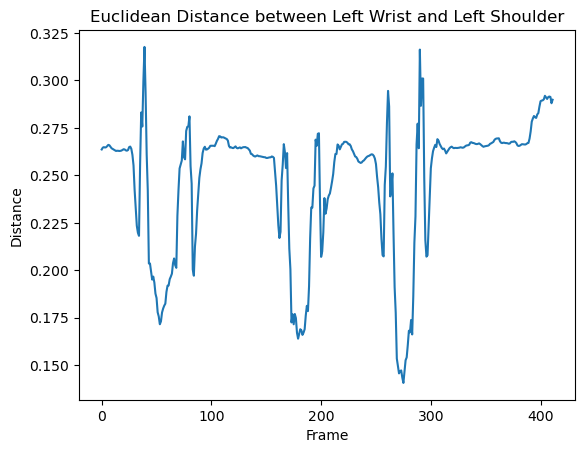

In [17]:
left_wrist = df["LEFT_WRIST"].apply(ast.literal_eval)
left_shoulder = df["LEFT_SHOULDER"].apply(ast.literal_eval)

distances = [euclidean_distance(wrist, shoulder) for wrist, shoulder in zip(left_wrist, left_shoulder)]

plt.plot(distances)
plt.title('Euclidean Distance between Left Wrist and Left Shoulder')
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.show()